<a href="https://colab.research.google.com/github/JavierHerreraPadilla/Story/blob/master/Dr%20Zimmerman%20-%20had%20washing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

DONDE SE ANALIZA LA EFECTIVIDAD DEL LAVADO DE MANOS EN LA PRECVENSIÓN DE MUERTES DE MADRES E HIJOS EN PARTO

In [2]:
ann = pd.read_csv('annual_deaths_by_clinic.csv')
mon = pd.read_csv('monthly_deaths.csv')

In [3]:
print('shape: ',ann.shape)
ann.head(3)


shape:  (12, 4)


,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1


In [4]:
print('shape: ', mon.shape)
mon.head(3)

shape:  (98, 3)


,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12


### ANNUAL HAS 12 ROWS AND 3 COLUMNS
### FIRST YEAR 1843 - LAST YEAR 1846

In [5]:
ann.describe()

,year,births,deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


### Month tiene 98 filas, y tres columnas. 

In [6]:
mon.describe()

,births,deaths
count,98.000000,98.000000
mean,267.000000,22.469388
std,41.769372,18.141031
min,190.000000,0.000000
25%,242.500000,8.000000
50%,264.000000,16.500000
75%,292.750000,36.750000
max,406.000000,75.000000


###CLEANING THE DATE Y CHANGING DATATYPES

In [7]:
ann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [8]:
ann['year'] = pd.to_datetime(ann['year'], format='%Y')
ann

,year,births,deaths,clinic
0,1841-01-01,3036,237,clinic 1
1,1842-01-01,3287,518,clinic 1
2,1843-01-01,3060,274,clinic 1
3,1844-01-01,3157,260,clinic 1
4,1845-01-01,3492,241,clinic 1
5,1846-01-01,4010,459,clinic 1
6,1841-01-01,2442,86,clinic 2
7,1842-01-01,2659,202,clinic 2
8,1843-01-01,2739,164,clinic 2
9,1844-01-01,2956,68,clinic 2


In [9]:
mon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [10]:
mon.date = pd.to_datetime(mon.date)

In [11]:
print('hay NaN en annual: ', ann.isna().values.any())
print('hay NaN en monthly: ', mon.isna().values.any())
print('hay duplicados en annual: ', ann.duplicated().values.any())
print('hay duplicados en monthly: ', ann.duplicated().values.any())

hay NaN en annual:  False
hay NaN en monthly:  False
hay duplicados en annual:  False
hay duplicados en monthly:  False


In [12]:
prob = ann.deaths.sum() / ann.births.sum() * 100
prob

7.083762852536147

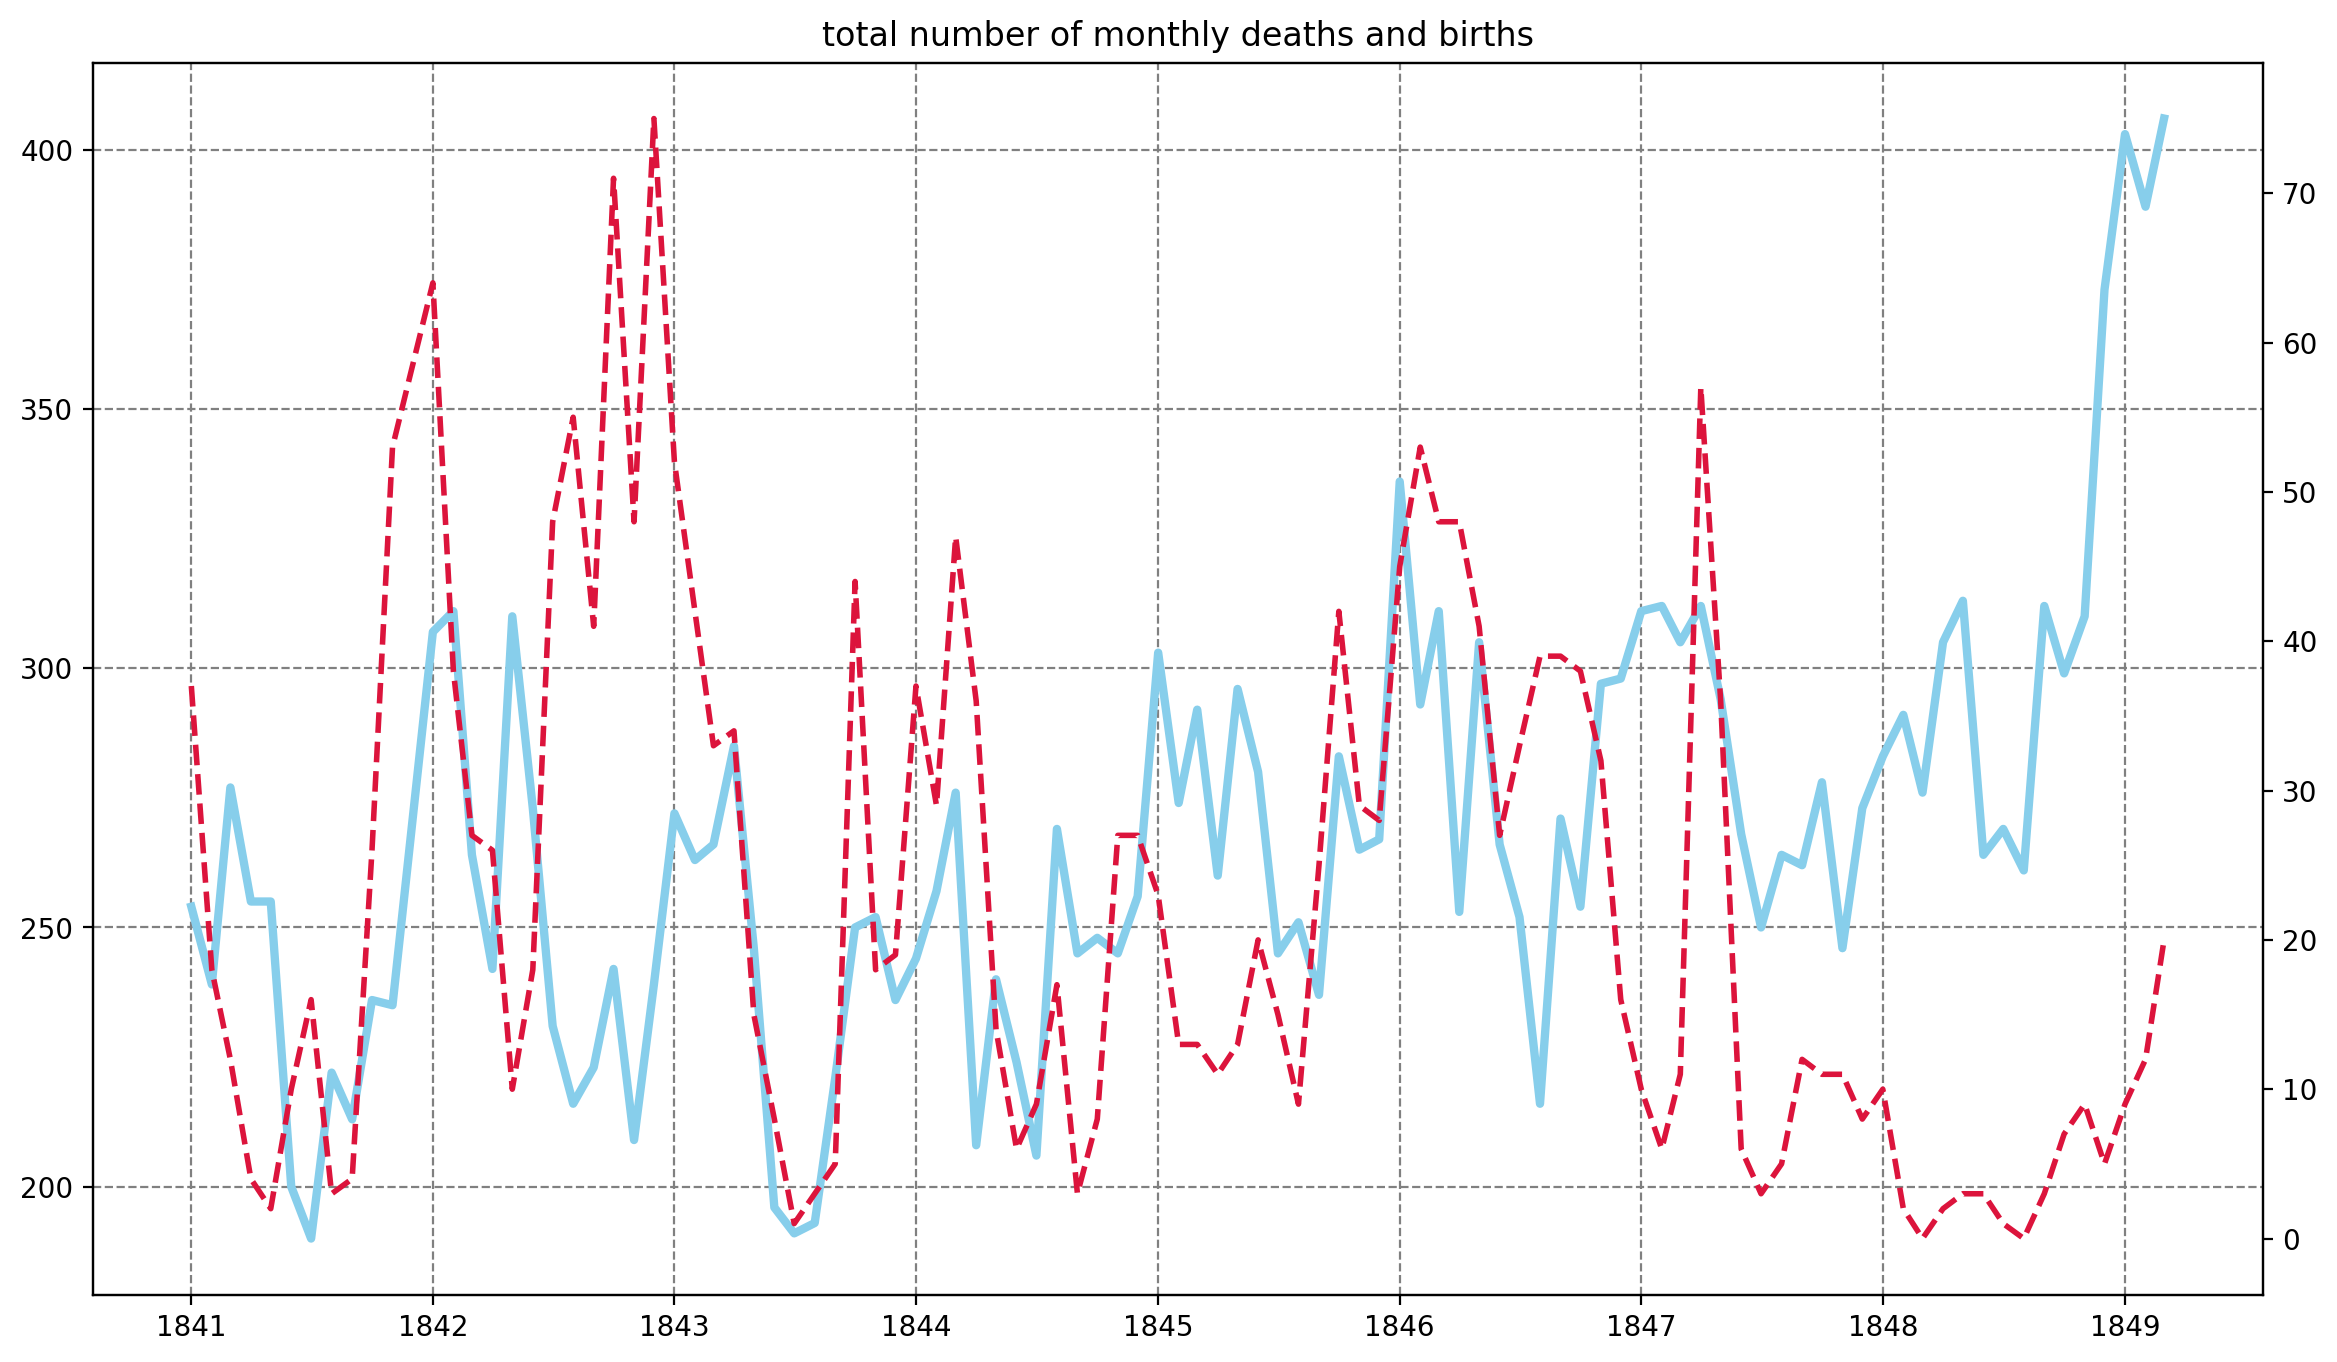

In [13]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('total number of monthly deaths and births')

ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.grid(color='gray', linestyle='--')
ax1.plot(mon.date,
         mon.births,
         color='skyblue',
         linewidth=3)
ax2.plot(mon.date,
         mon.deaths,
         color='crimson',
         linewidth=2,
         linestyle='--')

plt.show()

In [14]:
line = px.line(ann,
               x='year',
               y='births',
               color='clinic',
               title='born by clinic')
line.show()

In [15]:
line = px.line(ann,
               x='year',
               y='deaths',
               color='clinic',
               title='deaths by clinic')
line.show()

In [16]:
#proportion of deaths by clinic
ann
ann['pct_deaths'] = ann['deaths'] / ann['births']
ann

,year,births,deaths,clinic,pct_deaths
0,1841-01-01,3036,237,clinic 1,0.078063
1,1842-01-01,3287,518,clinic 1,0.157591
2,1843-01-01,3060,274,clinic 1,0.089542
3,1844-01-01,3157,260,clinic 1,0.082357
4,1845-01-01,3492,241,clinic 1,0.069015
5,1846-01-01,4010,459,clinic 1,0.114464
6,1841-01-01,2442,86,clinic 2,0.035217
7,1842-01-01,2659,202,clinic 2,0.075968
8,1843-01-01,2739,164,clinic 2,0.059876
9,1844-01-01,2956,68,clinic 2,0.023004


In [17]:
line = px.line(ann,
               x='year',
               y='pct_deaths',
               color='clinic',
               title='deaths by clinic')
line.show()

In [18]:
print('average maternal rate for clinic 1 and clinic 2'.upper())
ann.groupby('clinic').agg({'pct_deaths':pd.Series.mean})

AVERAGE MATERNAL RATE FOR CLINIC 1 AND CLINIC 2


,pct_deaths
clinic,
clinic 1,0.098505
clinic 2,0.040400


In [19]:
mon['pct_deaths'] = mon['deaths'] / mon['births']

In [20]:
mon['prev'] = mon['date'] >= '1846'
mon.groupby('prev').agg({'pct_deaths':pd.Series.mean})
#False is previous to 1846

,pct_deaths
prev,
False,0.100507
True,0.064562


In [21]:
before = mon[mon['date']<'1847-06']
after = mon[mon['date']>='1847-06']
before = before.set_index('date')
prev_roll = before.rolling(window=6).mean()
prev_roll
after

,date,births,deaths,pct_deaths,prev
76,1847-06-01,268,6,0.022388,True
77,1847-07-01,250,3,0.012000,True
78,1847-08-01,264,5,0.018939,True
79,1847-09-01,262,12,0.045802,True
80,1847-10-01,278,11,0.039568,True
81,1847-11-01,246,11,0.044715,True
82,1847-12-01,273,8,0.029304,True
83,1848-01-01,283,10,0.035336,True
84,1848-02-01,291,2,0.006873,True
85,1848-03-01,276,0,0.000000,True


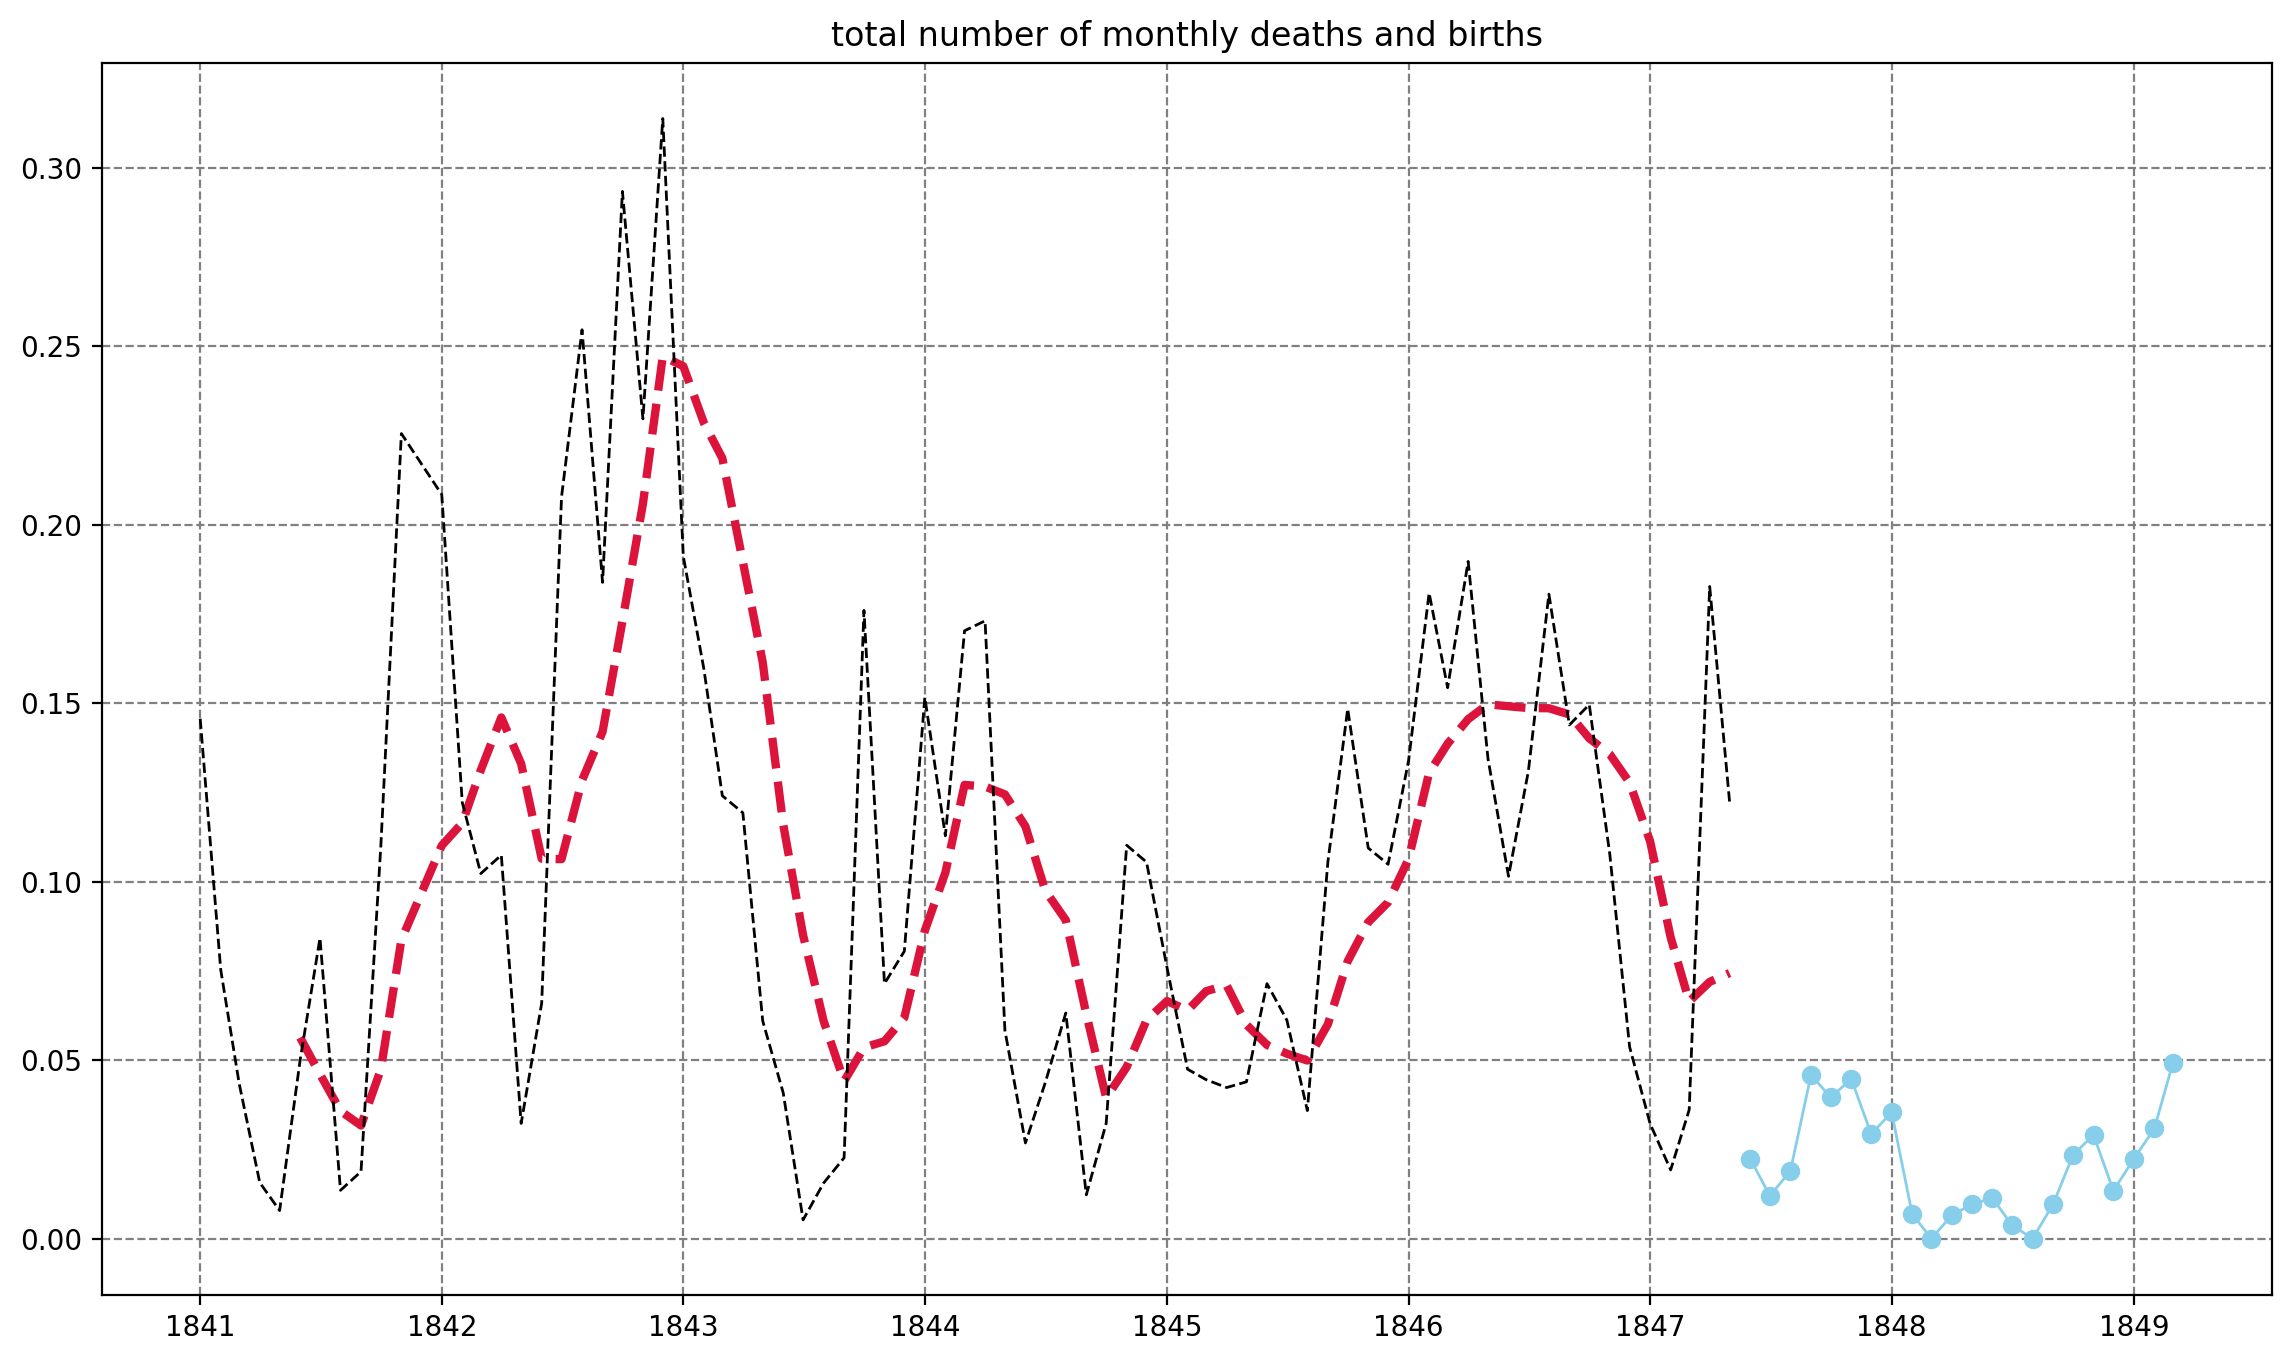

In [22]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('total number of monthly deaths and births')

# ax = plt.gca()


plt.grid(color='gray', linestyle='--')

ma_line = plt.plot(prev_roll.index,
         prev_roll.pct_deaths,
         color='crimson',
         linewidth=3,
         linestyle='--',
         label='6m moving average')

bw_line = plt.plot(before.index,
         before.pct_deaths,
         color='black',
         linewidth=1,
         linestyle='--', 
         label='before hand washing')

aw_line = plt.plot(after.date,
                   after.pct_deaths, 
                   color='skyblue',
                   linewidth=1,
                   marker='o', 
                   label='after hand washing')

plt.show()

In [23]:
# BEFORE
print('promedio fraccion de muertes antes de lavado de manos', before.pct_deaths.mean())
print('promedio fraccion de muertes después de lavado de manos', after.pct_deaths.mean())

promedio fraccion de muertes antes de lavado de manos 0.10504998260908789
promedio fraccion de muertes después de lavado de manos 0.021093375097254535


In [24]:
print('reduction: ', (before.pct_deaths.mean() - after.pct_deaths.mean()) / before.pct_deaths.mean())

reduction:  0.7992062961519258


In [25]:
#how many times lower are the chaces of dying after hadwashing compared to before?
before.pct_deaths.mean() / after.pct_deaths.mean()

4.980235838254304

In [26]:
mon['washing_hands'] = np.where(mon.date < '1847-06', 'No', 'Yes')


In [27]:
box = px.box(mon,
             x='washing_hands',
             y='pct_deaths',
             color='washing_hands',
             title='how have the stats changed with handwashing?')

box.update_layout(xaxis_title='washing hands?',
                  yaxis_title='% of monthly deaths')

box.show()

In [28]:
# histograma
hist = px.histogram(mon,
                    x='pct_deaths',
                    color='washing_hands',
                    nbins=30,
                    opacity=0.6,
                    barmode='overlay',
                    histnorm='percent',
                    marginal='box')

hist.show()

<ipython-input-29-e932fba4610c>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-29-e932fba4610c>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




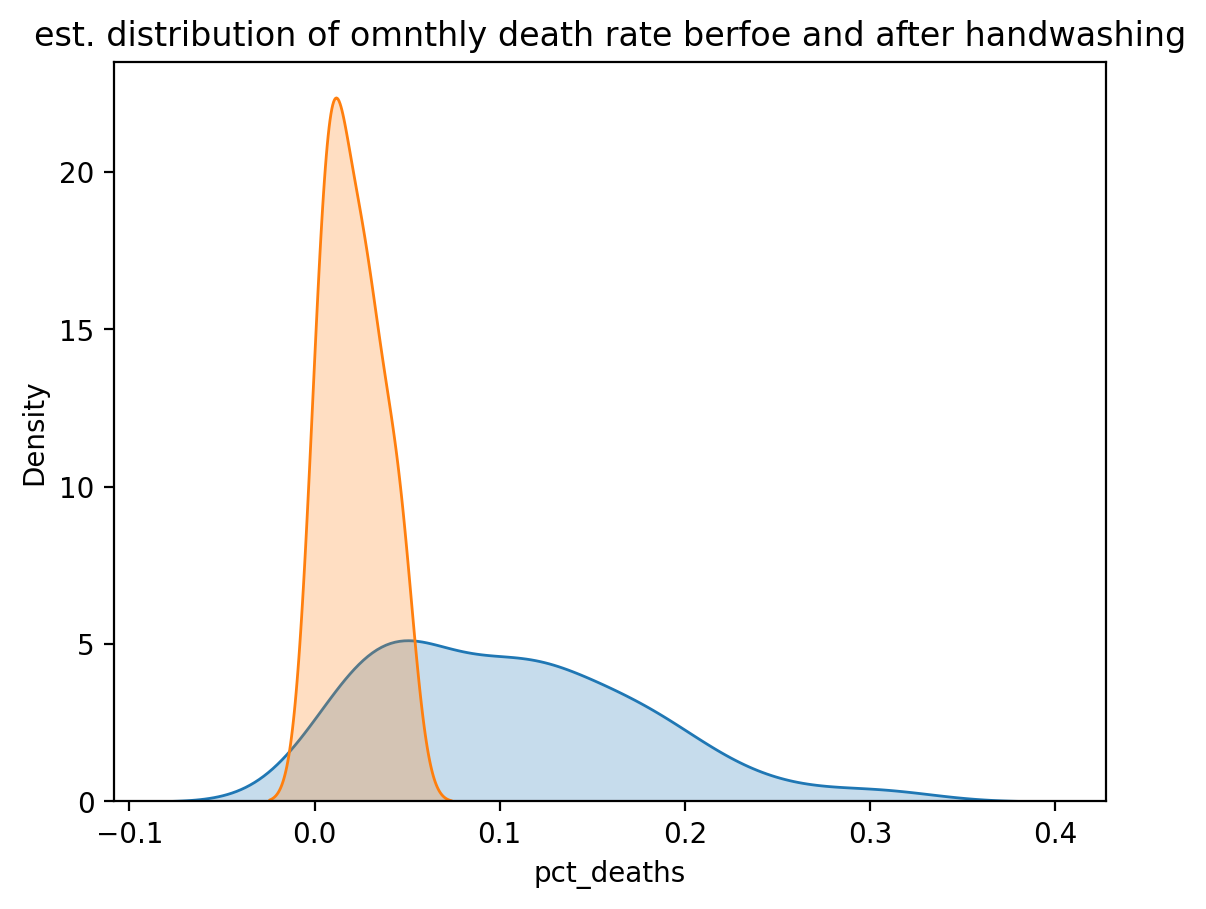

In [29]:
# kernel density estimate to visualize a smooth distribution
plt.figure(dpi=200)
sns.kdeplot(before.pct_deaths, shade=True)
sns.kdeplot(after.pct_deaths, shade=True)
plt.title('est. distribution of omnthly death rate berfoe and after handwashing')
plt.show()

<ipython-input-30-9207e765ec13>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-30-9207e765ec13>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




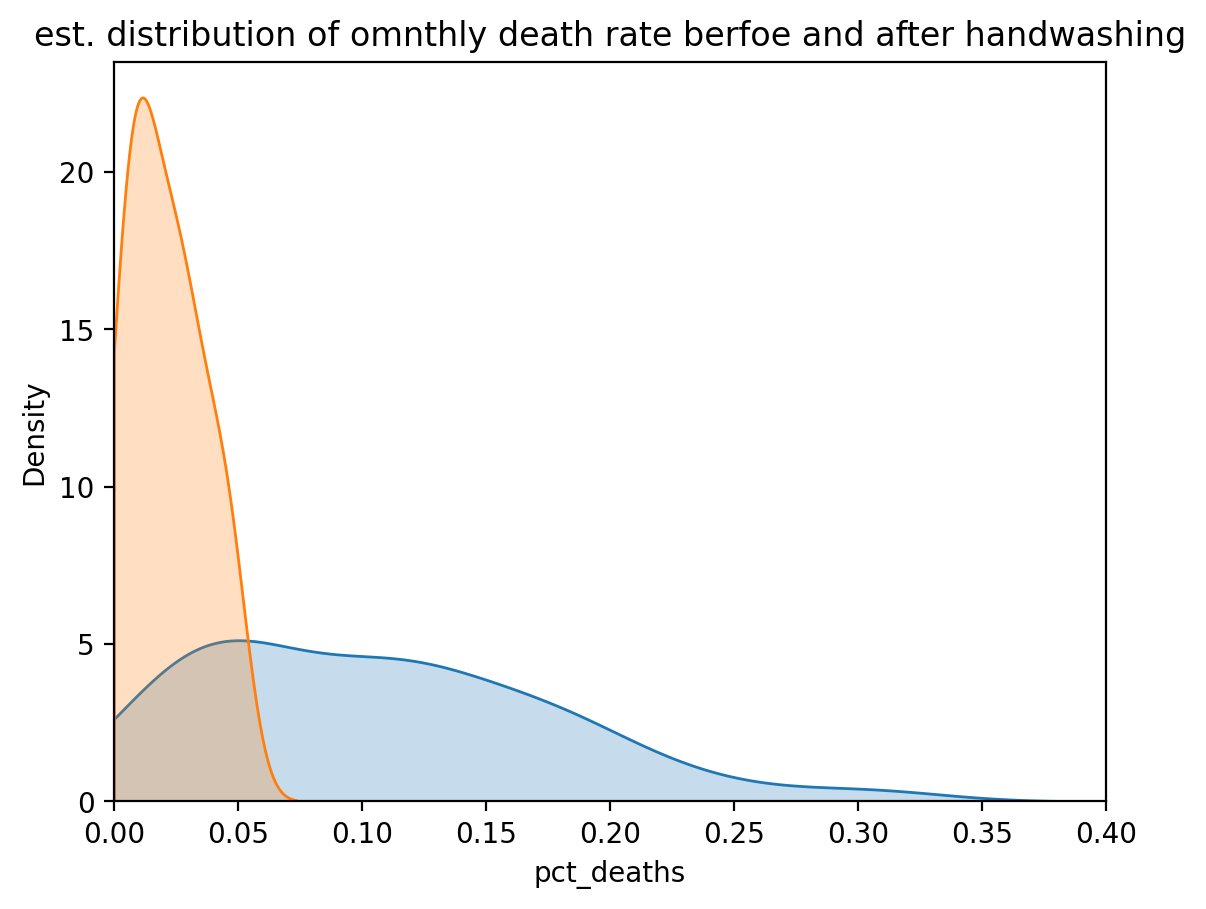

In [30]:
plt.figure(dpi=200)
sns.kdeplot(before.pct_deaths, shade=True, clip=(0,1))
sns.kdeplot(after.pct_deaths, shade=True, clip=(0,1))
plt.title('est. distribution of omnthly death rate berfoe and after handwashing')
plt.xlim(0, 0.4)
plt.show()

In [31]:
# use a t-test to show statistical significance
import scipy.stats as stats

In [32]:
t_stat, p_value = stats.ttest_ind(a=before.pct_deaths,
                                  b=after.pct_deaths)
print('p-value is :', p_value)
print('t-statstic is :', t_stat)

p-value is : 2.985436556724523e-07
t-statstic is : 5.511607211341916
